In [108]:
import pandas as pd
import numpy as np
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
import matplotlib.pyplot as plt

In [147]:
trainDf = pd.read_csv("../original_dataset/annotations/image_labels_train.csv")
trainDf = trainDf.drop(["rad_id"], axis = 1)
trainDf = trainDf.groupby("image_id").max().reset_index() #as combined

trainDf.describe()

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,ILD,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.206533,0.012467,0.030533,0.154400,0.00180,0.023533,0.000867,0.005400,0.008733,0.026467,...,0.006400,0.108067,0.00600,0.076933,0.002400,0.019400,0.061267,0.050000,0.291800,0.707067
std,0.404831,0.110960,0.172055,0.361344,0.04239,0.151595,0.029427,0.073288,0.093046,0.160524,...,0.079746,0.310475,0.07723,0.266495,0.048933,0.137931,0.239827,0.217952,0.454606,0.455123
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
X = trainDf.index.values.reshape(-1,1)
X

trainDf = trainDf.drop(["COPD","Lung tumor","Pneumonia","Tuberculosis","Other diseases","No finding"], axis = 1)
y = trainDf.drop(["image_id"], axis = 1)
y = y.values

y = np.asmatrix(y)
print(np.shape(y))

(15000, 22)


In [149]:
Counter(combination for row in get_combination_wise_output_matrix(y.A, order=2) for combination in row)

Counter({(0, 0): 3098,
         (3, 3): 2316,
         (17, 17): 2010,
         (0, 3): 1975,
         (19, 19): 1621,
         (0, 17): 1344,
         (11, 11): 1331,
         (21, 21): 1154,
         (16, 16): 1038,
         (17, 19): 971,
         (0, 19): 940,
         (3, 17): 861,
         (16, 17): 844,
         (15, 15): 841,
         (0, 11): 771,
         (0, 21): 724,
         (11, 17): 711,
         (11, 19): 666,
         (17, 21): 620,
         (10, 10): 613,
         (0, 16): 571,
         (11, 16): 543,
         (3, 19): 535,
         (3, 21): 512,
         (19, 21): 510,
         (3, 11): 507,
         (16, 19): 499,
         (0, 15): 498,
         (11, 21): 483,
         (2, 2): 458,
         (10, 19): 414,
         (15, 17): 410,
         (9, 9): 397,
         (11, 15): 396,
         (15, 19): 380,
         (10, 11): 378,
         (16, 21): 367,
         (5, 5): 353,
         (3, 16): 349,
         (15, 21): 329,
         (10, 17): 322,
         (0, 10): 302,
       

In [150]:
np.random.seed(1243)
X_train, y_train, X_val, y_val = iterative_train_test_split(X, y, test_size = 0.2)

In [142]:
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train.A, order=2) for combination in row),
    'val' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_val.A, order=2) for combination in row)
}).T.fillna(0.0)

,"(17, 17)","(9, 19)","(0, 0)","(3, 17)","(9, 9)","(0, 19)","(0, 3)","(0, 9)","(17, 19)","(19, 19)",...,"(5, 6)","(2, 6)","(12, 20)","(2, 4)","(7, 20)","(13, 20)","(7, 18)","(2, 7)","(8, 12)","(4, 9)"
train,1608.0,166.0,2478.0,689.0,318.0,752.0,1580.0,192.0,777.0,1294.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,0.0
val,402.0,45.0,620.0,172.0,79.0,188.0,395.0,48.0,194.0,327.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0


In [151]:
trainSplit = trainDf.loc[X_train.flatten()]
valSplit = trainDf.loc[X_val.flatten()]

In [152]:
trainSplit

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Lung cavity,Lung cyst,Mediastinal shift,Nodule/Mass,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion
0,000434271f63a053c4128a0ba6352c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00053190460d56c53cc3e57321387478,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0006e0a85696f6bb578e84fafa9a5607,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0007d316f756b3fa0baea2ff514ce945,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,000ae00eb3942d27e0b97903dd563a6e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,ffc1b43cc2533b8adc71fb5237526523,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14991,ffceb71a80efba3b83c88e11f4b9694b,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14995,ffe6f9fe648a7ec29a50feb92d6c15a4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14997,ffeffc54594debf3716d6fcd2402a99f,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
valSplit

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Lung cavity,Lung cyst,Mediastinal shift,Nodule/Mass,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion
2,0005e8e3701dfb1dd93d53e2ff537b6e,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,00150343289f317a0ad5629d5b7d9ef9,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
9,001d127bad87592efe45a5c7678f8b8d,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21,0061cf6d35e253b6e7f03940592cc35e,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
23,00675cd546313f912cadd4ad54415d69,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,ffdd027d6aa68286ea30c61ab6f58454,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14993,ffe0131765a4c58a0f59abb68b192dbd,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14994,ffe07f4f98a7242b460c8d3a8e46832c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,ffea246f04196af602c7dc123e5e48fc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


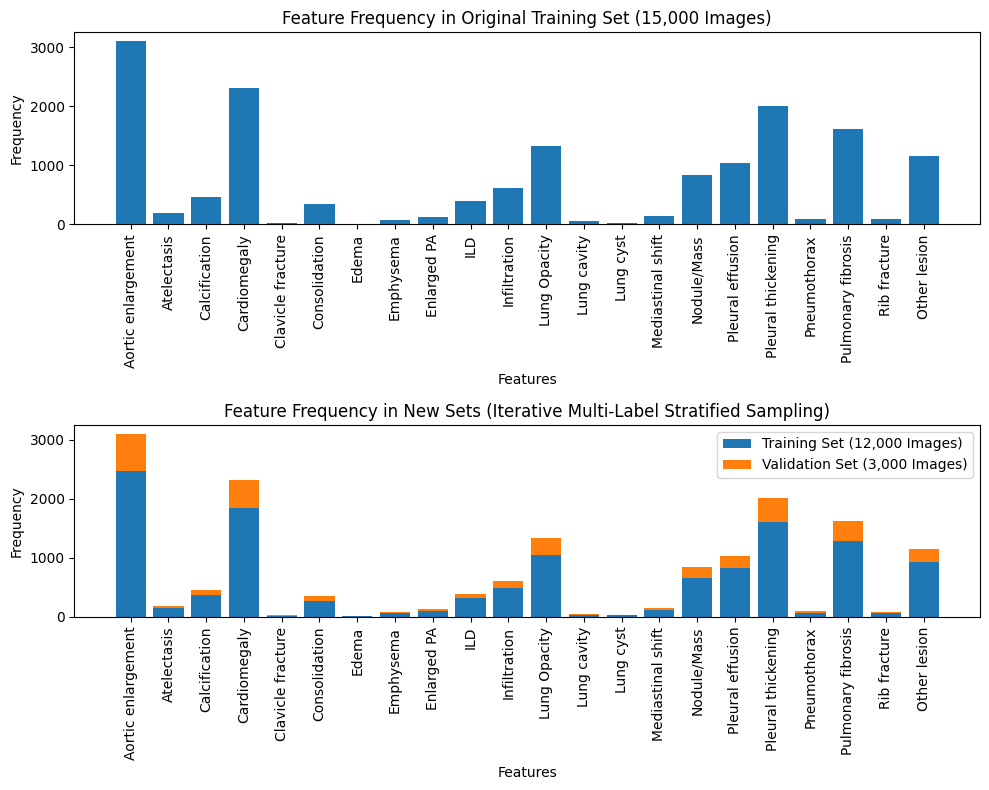

In [170]:
original_freq = trainDf.drop("image_id", axis = 1).sum()

train_freq = trainSplit.drop("image_id", axis = 1).sum()

# Calculate the frequency of each feature in the validation set
val_freq = valSplit.drop("image_id", axis = 1).sum()

# Plot the bar charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Original df bar chart
axes[0].bar(original_freq.index, original_freq.values)
axes[0].set_title('Feature Frequency in Original Training Set (15,000 Images)')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Training set bar chart
axes[1].bar(train_freq.index, train_freq.values)
axes[1].set_title('Feature Frequency in New Sets (Iterative Multi-Label Stratified Sampling)')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=90)

# Validation set bar chart
axes[1].bar(val_freq.index, val_freq.values, bottom = train_freq.values)
axes[1].tick_params(axis='x', rotation=90)

axes[1].legend(["Training Set (12,000 Images)", "Validation Set (3,000 Images)"])

plt.tight_layout()
plt.savefig("TrainValDistribution.pdf")
plt.show()

In [157]:
print(pd.DataFrame(zip(original_freq.index,original_freq, train_freq, val_freq)))

                     0     1     2    3
0   Aortic enlargement  3098  2478  620
1          Atelectasis   187   147   40
2        Calcification   458   364   94
3         Cardiomegaly  2316  1853  463
4    Clavicle fracture    27    21    6
5        Consolidation   353   274   79
6                Edema    13    11    2
7            Emphysema    81    65   16
8          Enlarged PA   131   103   28
9                  ILD   397   318   79
10        Infiltration   613   488  125
11        Lung Opacity  1331  1054  277
12         Lung cavity    51    41   10
13           Lung cyst    33    25    8
14   Mediastinal shift   150   116   34
15         Nodule/Mass   841   668  173
16    Pleural effusion  1038   824  214
17  Pleural thickening  2010  1608  402
18        Pneumothorax    96    71   25
19  Pulmonary fibrosis  1621  1294  327
20        Rib fracture    90    71   19
21        Other lesion  1154   923  231


In [173]:
trainSplit.to_csv("image_labels_trainNEW.csv", index = None)
valSplit.to_csv("image_labels_valNEW.csv", index = None)

In [175]:
print(trainSplit[trainSplit["image_id"].isin(list(valSplit["image_id"]))])
print(valSplit[valSplit["image_id"].isin(list(trainSplit["image_id"]))])

#we know that there is no overlap of images

Empty DataFrame
Columns: [image_id, Aortic enlargement, Atelectasis, Calcification, Cardiomegaly, Clavicle fracture, Consolidation, Edema, Emphysema, Enlarged PA, ILD, Infiltration, Lung Opacity, Lung cavity, Lung cyst, Mediastinal shift, Nodule/Mass, Pleural effusion, Pleural thickening, Pneumothorax, Pulmonary fibrosis, Rib fracture, Other lesion]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [image_id, Aortic enlargement, Atelectasis, Calcification, Cardiomegaly, Clavicle fracture, Consolidation, Edema, Emphysema, Enlarged PA, ILD, Infiltration, Lung Opacity, Lung cavity, Lung cyst, Mediastinal shift, Nodule/Mass, Pleural effusion, Pleural thickening, Pneumothorax, Pulmonary fibrosis, Rib fracture, Other lesion]
Index: []

[0 rows x 23 columns]
